In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
df=pd.read_csv('bank.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [73]:
df.shape

(10000, 14)

In [74]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## FEATURE ENGINEERING

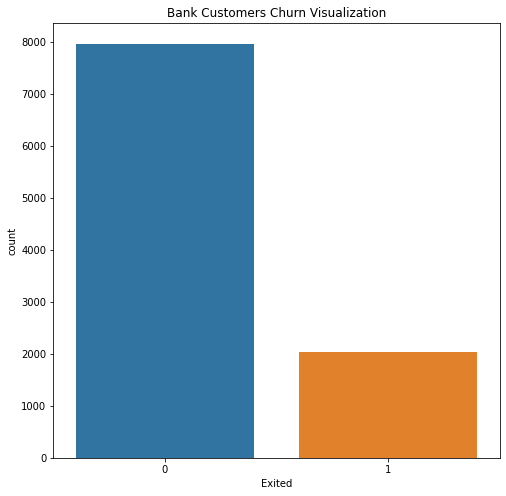

In [75]:
plt.figure(figsize=(8,8))
sns.countplot(x='Exited', data=df)
plt.title('Bank Customers Churn Visualization')
plt.show()

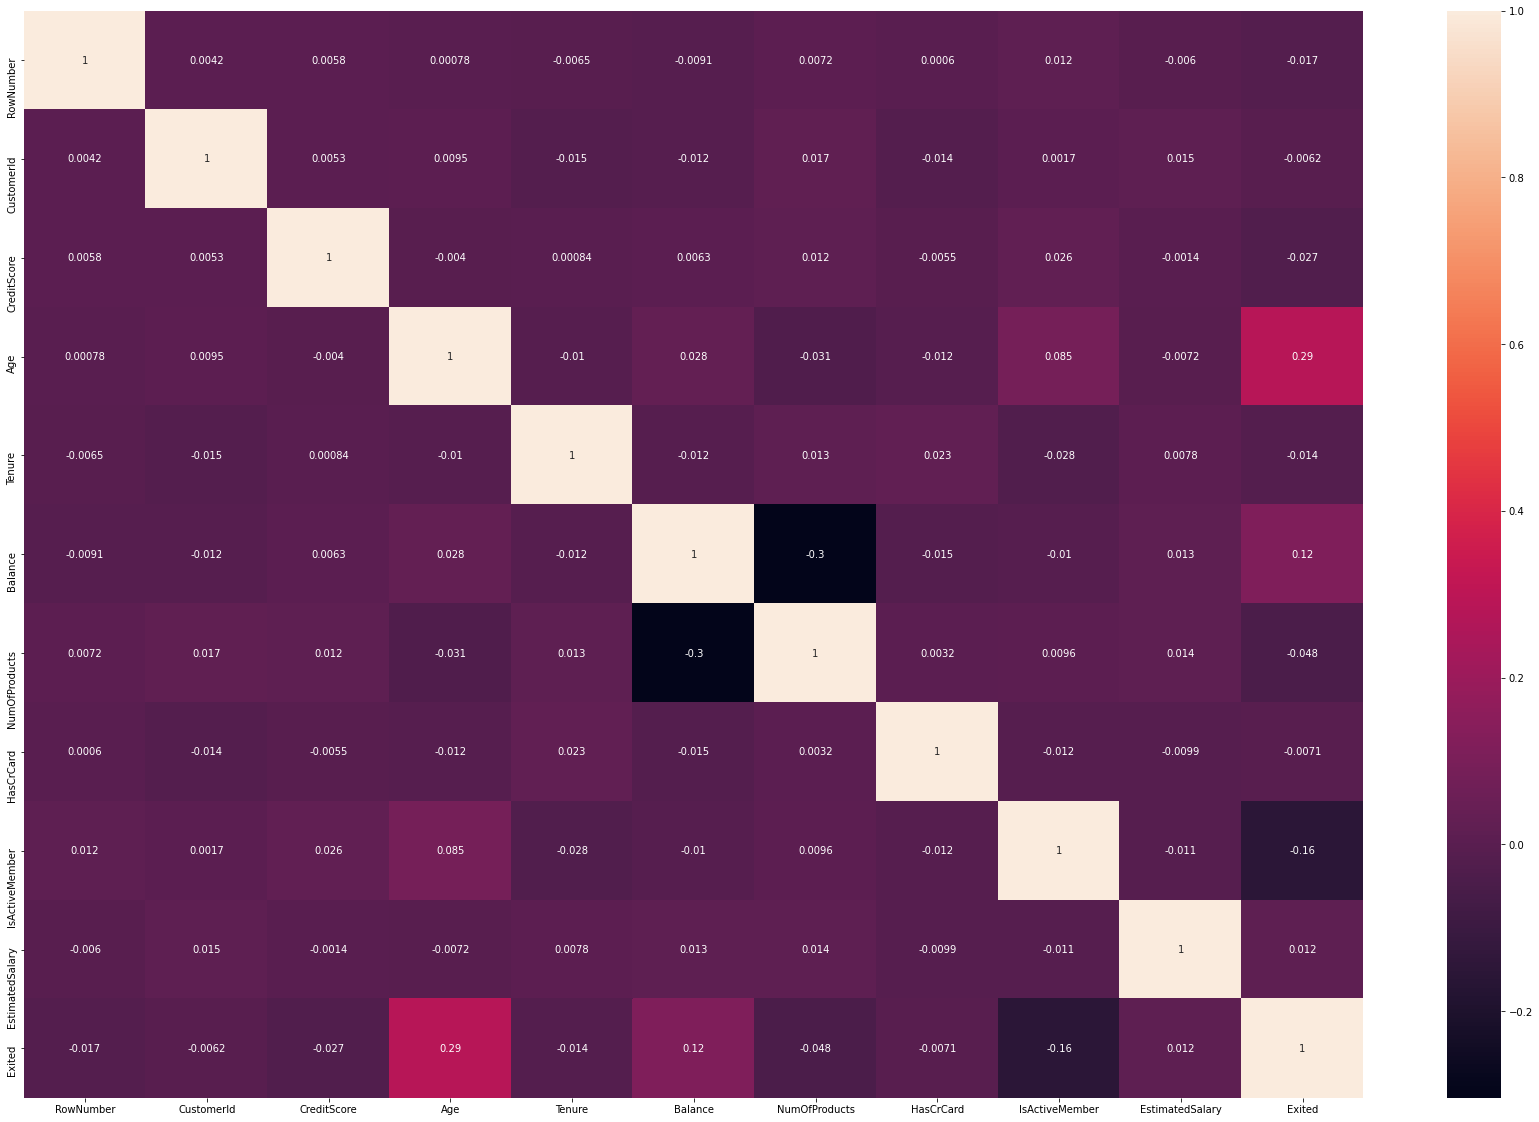

In [76]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)

In [77]:
df= df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
g = {'Male' : 0, 'Female' : 1}

In [79]:
df['Gender'] = df['Gender'].map(g)

In [80]:
geography = pd.get_dummies(df['Geography'], drop_first=True)

In [81]:
df = pd.concat([df, geography], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,France,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,1,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [82]:
df=df.drop(['Geography'], axis=1)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


## OUTLIER REMOVAL

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

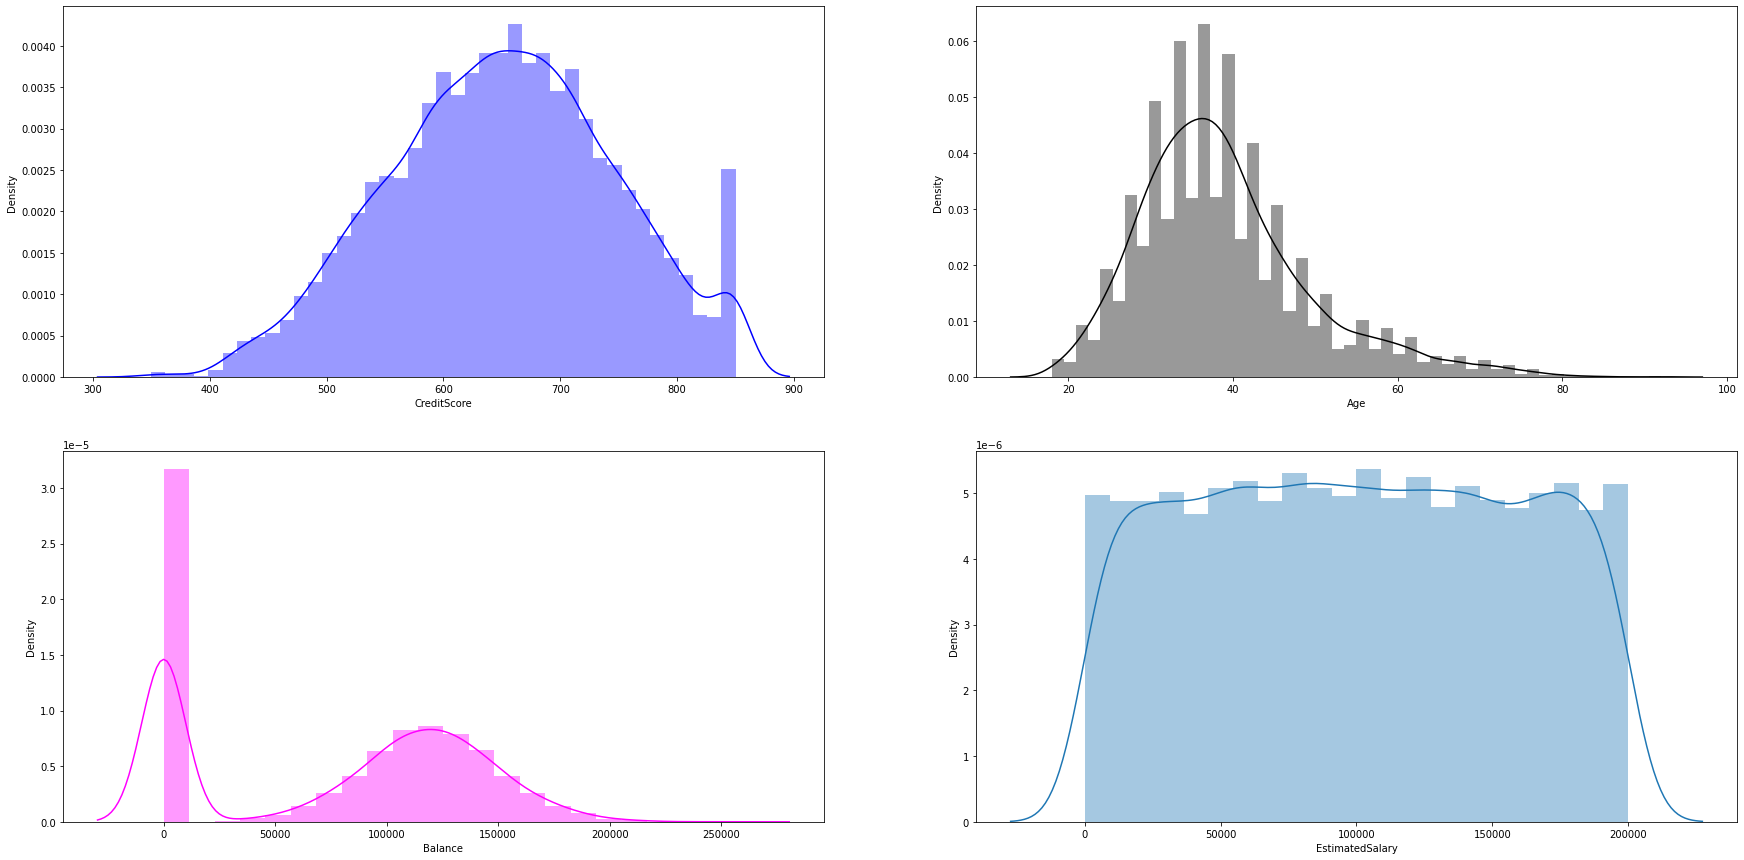

In [83]:
fig, ax = plt.subplots(2,2,figsize = (30,15))
sns.distplot(df["CreditScore"], kde =True, ax=ax[0,0], color = "blue")
sns.distplot(df["Age"], kde =True, ax=ax[0,1], color = "black")
sns.distplot(df["Balance"], kde =True, ax=ax[1,0], color = "magenta")
sns.distplot(df["EstimatedSalary"], kde =True, ax=ax[1,1])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

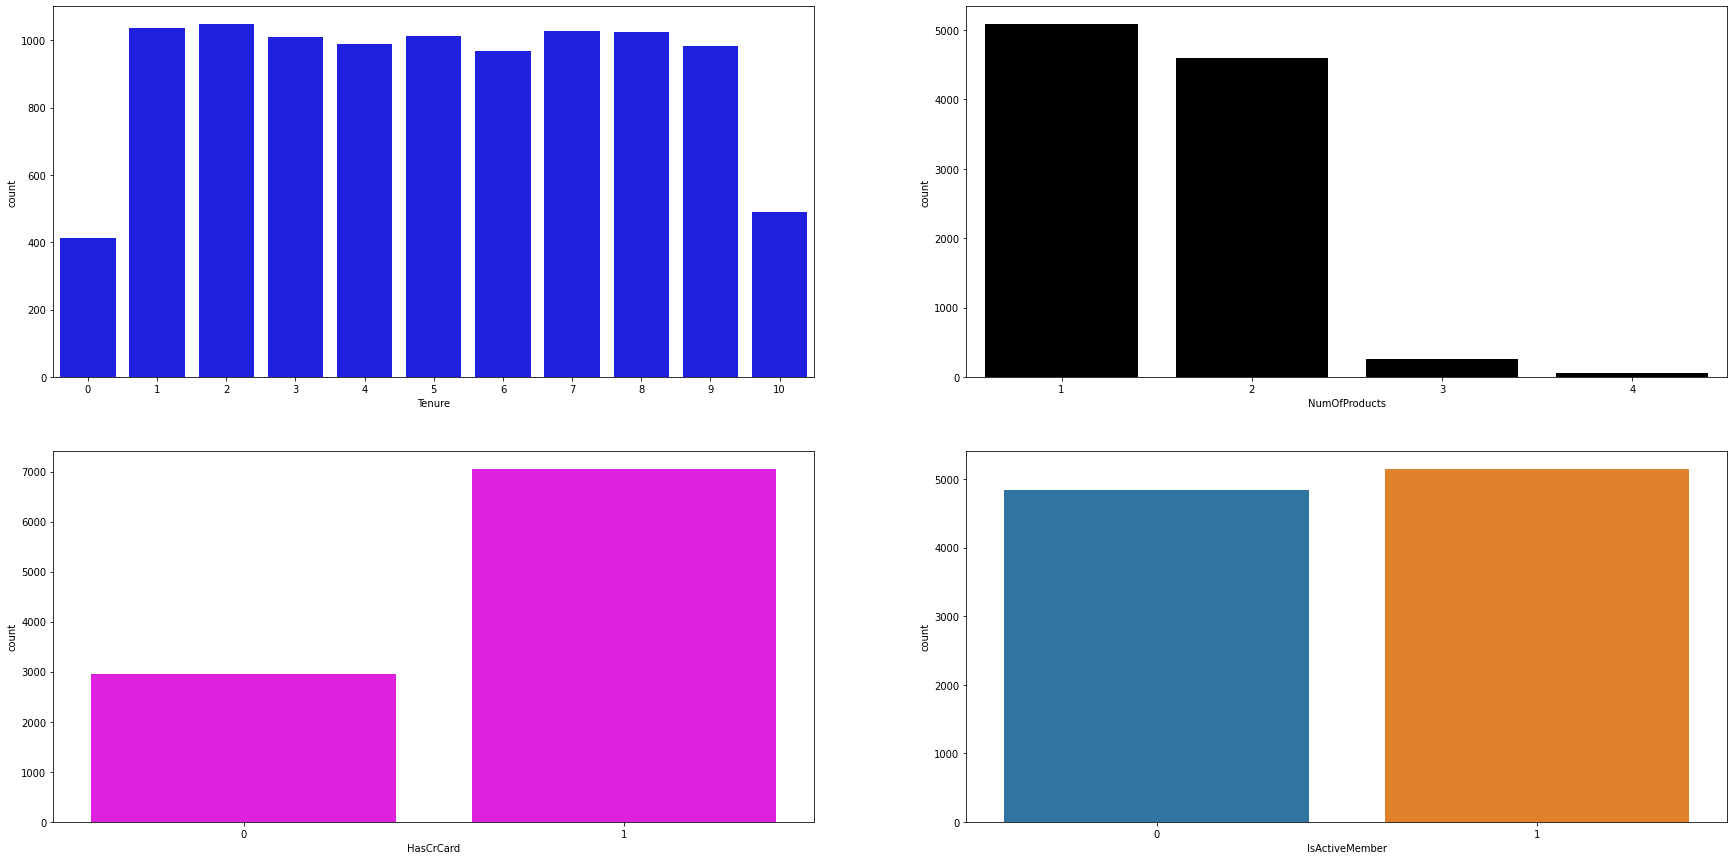

In [84]:
fig, ax = plt.subplots(2,2,figsize = (30,15))
sns.countplot(df["Tenure"], ax=ax[0,0], color = "blue")
sns.countplot(df["NumOfProducts"], ax=ax[0,1], color = "black")
sns.countplot(df["HasCrCard"], ax=ax[1,0], color = "magenta")
sns.countplot(df["IsActiveMember"], ax=ax[1,1])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

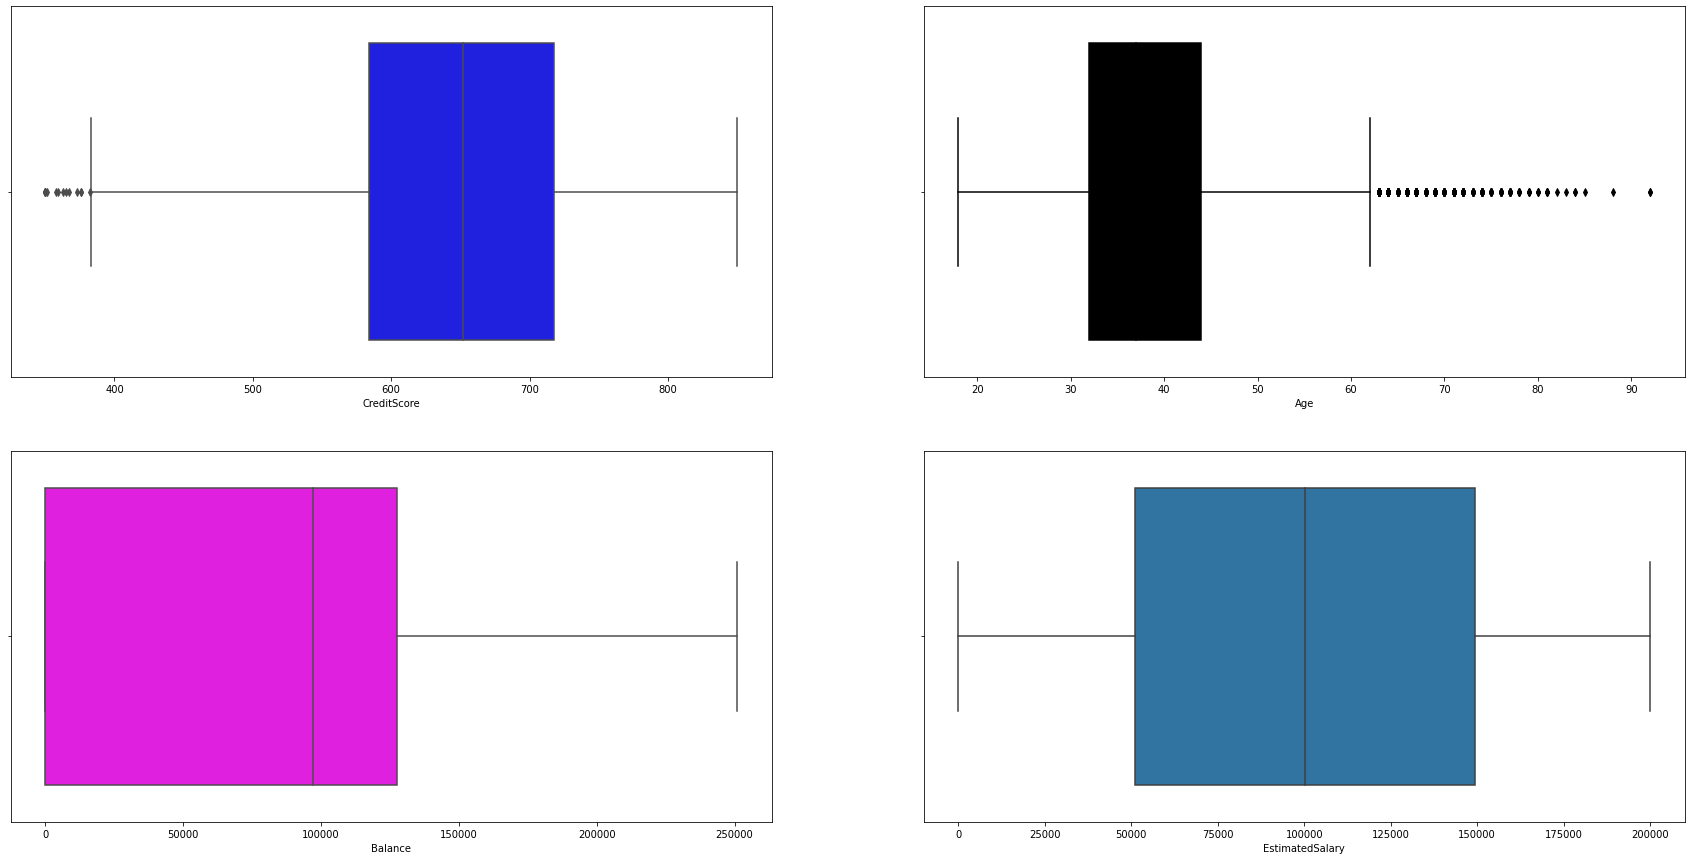

In [85]:
fig, ax = plt.subplots(2,2,figsize = (30,15))
sns.boxplot(df["CreditScore"], ax=ax[0,0], color = "blue")
sns.boxplot(df["Age"], ax=ax[0,1], color = "black")
sns.boxplot(df["Balance"], ax=ax[1,0], color = "magenta")
sns.boxplot(df["EstimatedSalary"], ax=ax[1,1])


In [86]:
df.loc[df['Age']>61, 'Age'] = 61
df.loc[df['CreditScore']<390, 'CreditScore'] = 390

In [87]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

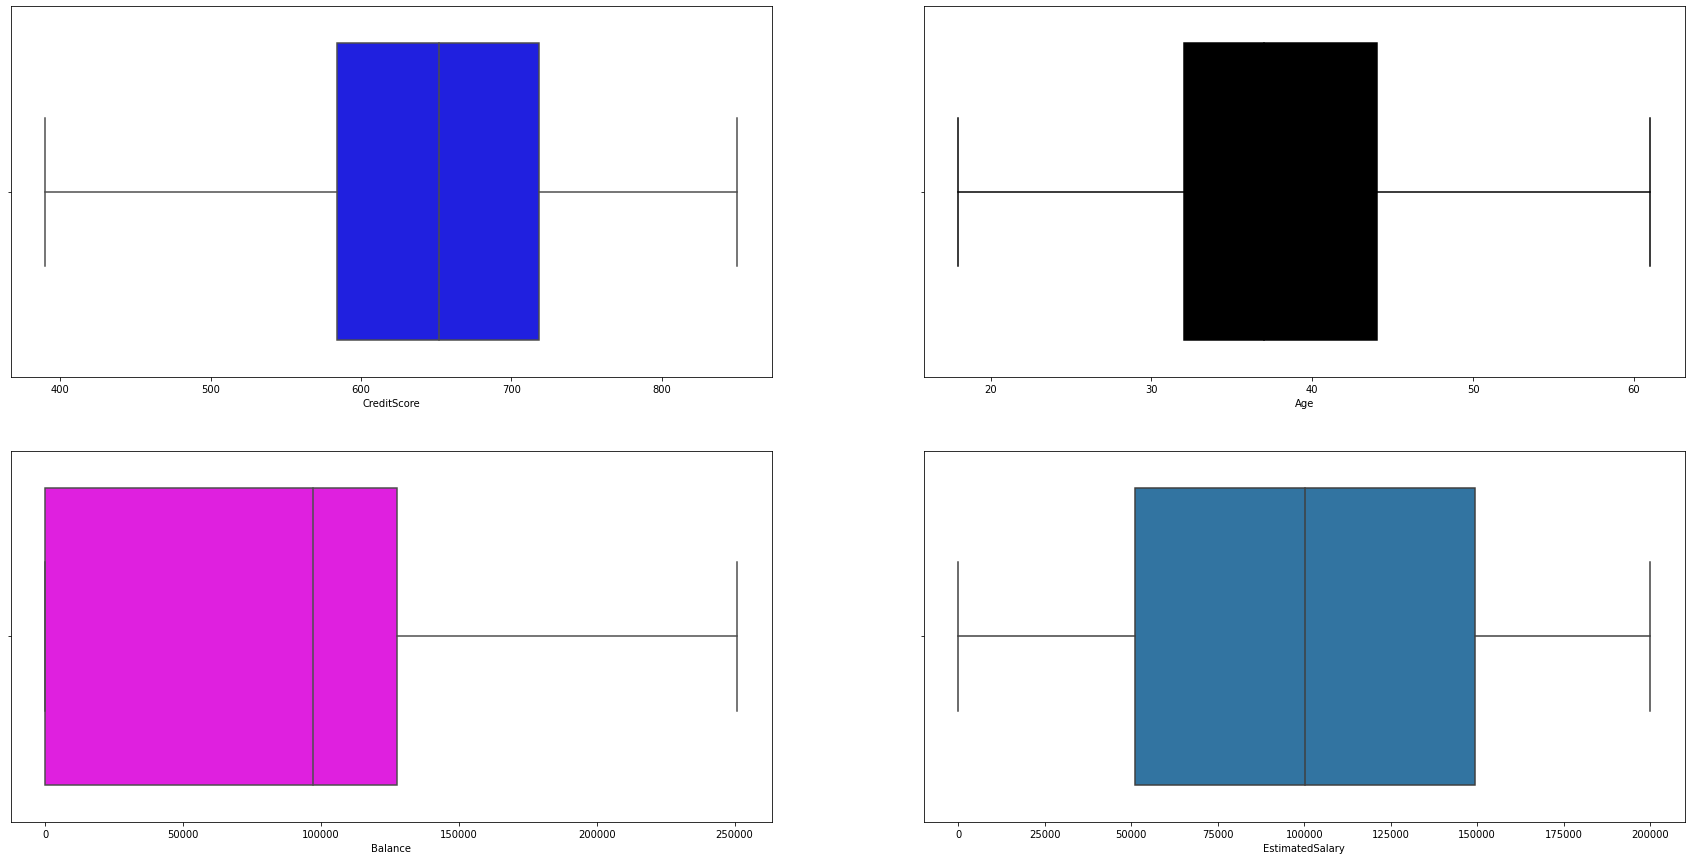

In [88]:
fig, ax = plt.subplots(2,2,figsize = (30,15))
sns.boxplot(df["CreditScore"], ax=ax[0,0], color = "blue")
sns.boxplot(df["Age"], ax=ax[0,1], color = "black")
sns.boxplot(df["Balance"], ax=ax[1,0], color = "magenta")
sns.boxplot(df["EstimatedSalary"], ax=ax[1,1])

## NORMALIZATION TECHNIQUE (MINMAXSCALER)

In [89]:
feature_scale=[feature for feature in df.columns if feature not in ['Exited']]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [90]:
df=pd.concat([df[['Exited']].reset_index(drop=True), pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)], axis=1)
df.head()

,Exited,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,1,0.497826,1.0,0.558140,0.2,0.000000,0.000000,1.0,1.0,0.506735,0.0,0.0
1,0,0.473913,1.0,0.534884,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0
2,1,0.243478,1.0,0.558140,0.8,0.636357,0.666667,1.0,0.0,0.569654,0.0,0.0
3,0,0.671739,1.0,0.488372,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0
4,0,1.000000,1.0,0.581395,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0


## TRAIN TEST SPLIT

In [91]:
x=df.drop(['Exited'], axis = 1)
y=df['Exited']
x.shape, y.shape

((10000, 11), (10000,))

In [92]:
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,0.497826,1.0,0.558140,0.2,0.000000,0.000000,1.0,1.0,0.506735,0.0,0.0
1,0.473913,1.0,0.534884,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0
2,0.243478,1.0,0.558140,0.8,0.636357,0.666667,1.0,0.0,0.569654,0.0,0.0
3,0.671739,1.0,0.488372,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0
4,1.000000,1.0,0.581395,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0


In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

## ARTIFICIAL NEURAL NETWORK

In [94]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [95]:
clf = Sequential()
clf.add(Dense(units = 10, kernel_initializer = 'he_normal', activation='relu', input_dim = 11))
clf.add(Dense(units = 20, kernel_initializer = 'he_normal', activation='relu'))
clf.add(Dense(units = 1, kernel_initializer = 'glorot_normal', activation = 'sigmoid'))
clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [96]:
model = clf.fit(x_train, y_train, batch_size=10, validation_split=0.30, epochs=100)

Epoch 1/100
560/560 [==============================] - 2s 3ms/step - loss: 0.5888 - accuracy: 0.7030 - val_loss: 0.4775 - val_accuracy: 0.7958
Epoch 2/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4740 - accuracy: 0.7911 - val_loss: 0.4584 - val_accuracy: 0.8000
Epoch 3/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4439 - accuracy: 0.8083 - val_loss: 0.4436 - val_accuracy: 0.8100
Epoch 4/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4355 - accuracy: 0.8126 - val_loss: 0.4359 - val_accuracy: 0.8104
Epoch 5/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4265 - accuracy: 0.8256 - val_loss: 0.4340 - val_accuracy: 0.8133
Epoch 6/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4282 - accuracy: 0.8140 - val_loss: 0.4285 - val_accuracy: 0.8129
Epoch 7/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4198 - accuracy: 0.8228 - val_loss: 0.4259 - val_accuracy: 0.8171

In [97]:
y_pred=clf.predict(x_test)
y_pred

array([[0.19925672],
       [0.34635606],
       [0.09734529],
       ...,
       [0.14256993],
       [0.15021802],
       [0.25949913]], dtype=float32)

In [98]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1531,   64],
       [ 205,  200]])

In [100]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print('The accuracy of ANN model is: {}%'.format(score*100))

The accuracy of ANN model is: 86.55000000000001%


In [104]:
def predict_exit(sample_value):
  
  # Convert list to numpy array
  sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
  sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
  sample_value = scaler.transform(sample_value)

  return clf.predict(sample_value)

In [105]:
sample_value = [738, 0, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High chance of exit!')
else:
  print('Prediction: Low chance of exit.')

Prediction: Low chance of exit.


In [106]:
sample_value = [805, 1, 45, 9, 116585.97, 1, 1, 0, 189428.75, 1, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High chance of exit!')
else:
  print('Prediction: Low chance of exit.')

Prediction: High chance of exit!
